In [69]:
# Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
train = pd.read_csv('/content/train.csv')

In [71]:
train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [73]:
train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [74]:
train.shape

(576, 12)

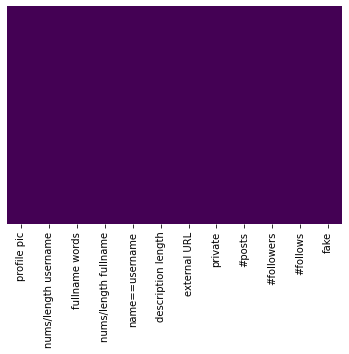

In [75]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

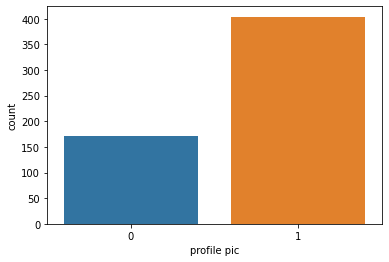

In [76]:
sns.countplot(x="profile pic", data=train)

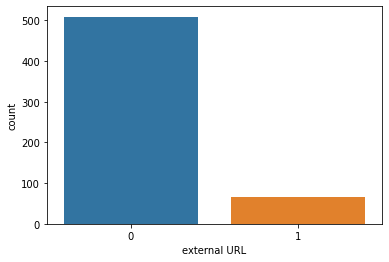

In [77]:
sns.countplot(x="external URL", data=train)
#maximum user are not having external url so it's not an important criteria 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


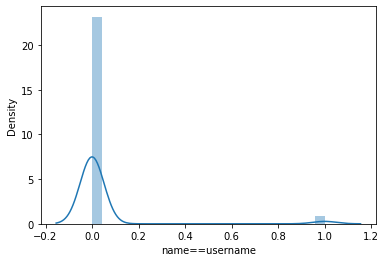

In [78]:
sns.distplot( train['name==username'] )
#as maximum number of user are not having same name and user name so it's not an important criteria

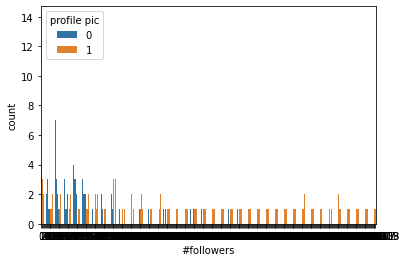

In [79]:
sns.countplot(x="#followers", data=train, hue="profile pic")
#user having high number of followers are having profile pic

In [81]:
train.drop(columns=['name==username','external URL'], inplace=True)

In [82]:
train.drop(columns=['nums/length username','fullname words','nums/length fullname'], inplace= True)

In [83]:
train

,profile pic,description length,private,#posts,#followers,#follows,fake
0,1,53,0,32,1000,955,0
1,1,44,0,286,2740,533,0
2,1,0,1,13,159,98,0
3,1,82,0,679,414,651,0
4,1,0,1,6,151,126,0
...,...,...,...,...,...,...,...
571,1,0,0,33,166,596,1
572,1,21,0,44,66,75,1
573,1,0,0,4,96,339,1
574,1,11,0,0,57,73,1


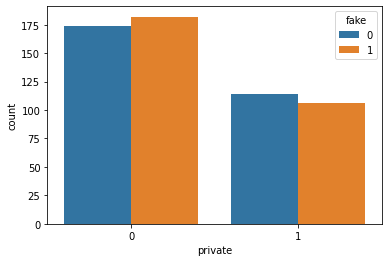

In [84]:
sns.countplot(x="private", data=train, hue="fake")
#no relation between private account and fake account

In [85]:
#dataframe of people having no profile pic
np=train.groupby(["profile pic"]).get_group((0))
np

,profile pic,description length,private,#posts,#followers,#follows,fake
174,0,14,1,131,533,1060,0
281,0,27,1,16,220,323,0
288,0,0,0,0,90,333,1
289,0,0,0,0,60,31,1
290,0,0,1,2,271,445,1
...,...,...,...,...,...,...,...
552,0,0,1,0,332,1333,1
553,0,0,0,0,14,542,1
556,0,0,0,0,26,27,1
561,0,0,0,0,57,130,1


In [86]:
#maximum number of followers of a user from no profile pic group
np["#followers"].max()

3033

In [87]:
dead_accounts=train[ (train['profile pic']==0) & (train['#posts']==0)  & (train['description length']==0)]
dead_accounts.shape[0]

123

In [88]:
#function to add content of expressive column
def get_expressive(train_row):
  if train_row['description length'] > train["description length"].mean():
    expressive = train_row['description length'] - train["description length"].mean()
  else:
    expressive = 0
  return expressive

In [89]:
#adding expressive column
train['expressive'] = train.apply(get_expressive, axis=1)

In [90]:
train

,profile pic,description length,private,#posts,#followers,#follows,fake,expressive
0,1,53,0,32,1000,955,0,30.376736
1,1,44,0,286,2740,533,0,21.376736
2,1,0,1,13,159,98,0,0.000000
3,1,82,0,679,414,651,0,59.376736
4,1,0,1,6,151,126,0,0.000000
...,...,...,...,...,...,...,...,...
571,1,0,0,33,166,596,1,0.000000
572,1,21,0,44,66,75,1,0.000000
573,1,0,0,4,96,339,1,0.000000
574,1,11,0,0,57,73,1,0.000000


In [94]:
train['expressive'].describe() #max and min value of expressive to compare the relative expressiveness

count    576.000000
mean      14.186746
std       30.138702
min        0.000000
25%        0.000000
50%        0.000000
75%       11.376736
max      127.376736
Name: expressive, dtype: float64

In [91]:
#maximum number of followers of a user having 0 post
train[train["#posts"]==0]['#followers'].max()

3033

In [92]:
#user having maximum munber of following
max_followers=train.groupby(["#followers"]).get_group((train["#followers"].max()))
max_followers

,profile pic,description length,private,#posts,#followers,#follows,fake,expressive
24,1,0,0,148,15338538,61,0,0.0


In [93]:
#ratio of the number of followers and following
max_followers["#followers"]/max_followers["#follows"]

24    251451.442623
dtype: float64